# Data Analysis

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [2]:
df = pd.read_csv('database.csv')
df.head()

,Unnamed: 0,Url,Source,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Area,...,Open fire,Terrace,Terrace Area,Garden,Garden Area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building
0,0,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,319799.0,regular sale,1.0,NaN,...,0.0,1.0,11.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,291999.0,regular sale,1.0,NaN,...,0.0,1.0,6.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
2,2,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,764999.0,regular sale,2.0,153.0,...,0.0,1.0,62.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
3,3,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,660264.0,regular sale,3.0,NaN,...,0.0,1.0,160.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4,4,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,3200,apartment,NaN,294999.0,regular sale,2.0,80.0,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [3]:
df.drop(columns=['Unnamed: 0', 'Url', 'Source'], inplace=True)
old_col=(df.columns)
new_col=[]
# rename column in a pythonic way
for item in old_col:
    item =item.lower()
    item= item.replace(' ','_')
    new_col.append(item)

df.columns=new_col
df.drop_duplicates(inplace=True)
df = df[~df['price'].isnull()]
df.reset_index(inplace=True, drop=True)
prices = df.pop('price')
df.insert(0, 'price', prices)
df.head()

,price,locality,type_of_property,subtype_of_property,type_of_sale,number_of_rooms,area,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,surface_area_of_the_plot_of_land,number_of_facades,swimming_pool,state_of_the_building
0,319799.0,2970,apartment,NaN,regular sale,1.0,NaN,0.0,0.0,0.0,1.0,11.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
1,291999.0,2970,apartment,NaN,regular sale,1.0,NaN,0.0,0.0,0.0,1.0,6.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
2,764999.0,2970,apartment,NaN,regular sale,2.0,153.0,0.0,0.0,0.0,1.0,62.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
3,660264.0,2970,apartment,NaN,regular sale,3.0,NaN,0.0,0.0,0.0,1.0,160.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4,294999.0,3200,apartment,NaN,regular sale,2.0,80.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


## 1) Correlations:

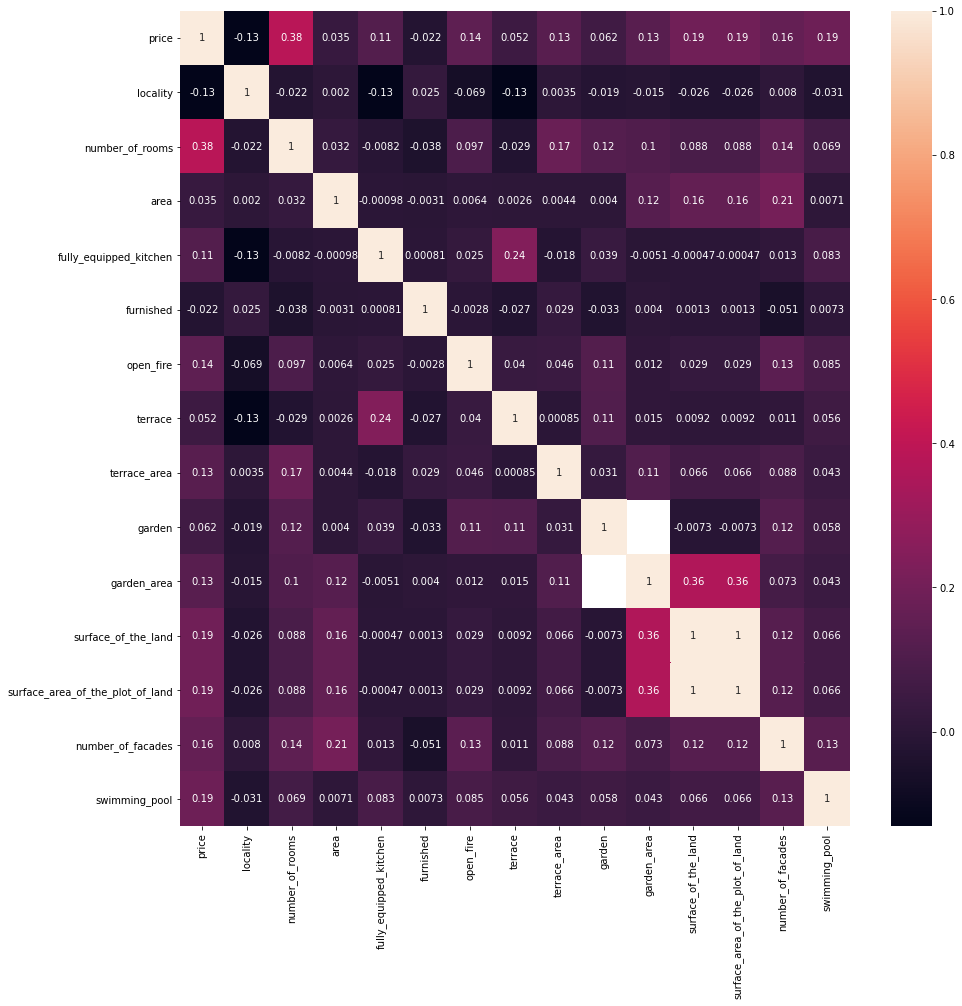

In [5]:
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df.corr(), annot=True)
plt.show()

Observation: surface_area_of_the_plot_of_land and surface_area_of_the_are have correlation 1. We can remove one of these columns

We look now more precisely at the correlations between our target variable (price) and the others

In [7]:
from scipy.stats import pearsonr
df_corr = pd.DataFrame(columns=['corr', 'p-value'])
for i in range(len(df.columns)):
    col = df.columns[i]
    if i==0 or df[col].dtypes != 'float64':
        continue
    df_col = df[['price', col]].dropna()
    df_corr.loc[col]=(pearsonr(df_col['price'], df_col[col]))
df_corr.sort_values(by='corr', ascending=False)

,corr,p-value
number_of_rooms,0.381926,0.000000e+00
surface_of_the_land,0.193190,4.355211e-288
surface_area_of_the_plot_of_land,0.193190,4.355211e-288
swimming_pool,0.187083,0.000000e+00
number_of_facades,0.164052,1.761635e-214
open_fire,0.144068,0.000000e+00
terrace_area,0.128406,8.345563e-86
garden_area,0.126986,1.987816e-40
fully_equipped_kitchen,0.114011,3.275796e-208
garden,0.061975,1.306895e-62


Observation: number_of_rooms_ and surface_of_the_land are the most correlated variables.

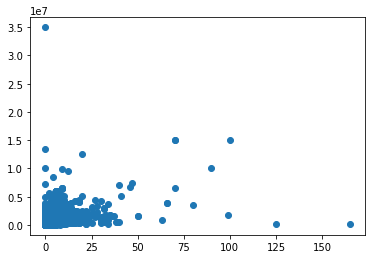

In [8]:
plt.scatter(df['number_of_rooms'], df['price'])
plt.show()

outliers make things are to read. Let's suppress them:

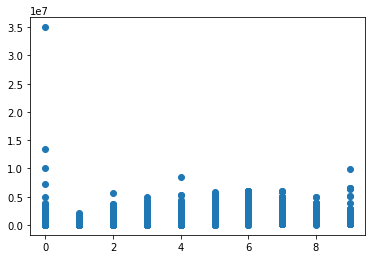

In [9]:
plt.scatter(df[df['number_of_rooms']<10]['number_of_rooms'], df[df['number_of_rooms']<10]['price'])


We look now at the correlations between variable for each category 'house' and 'apartement'

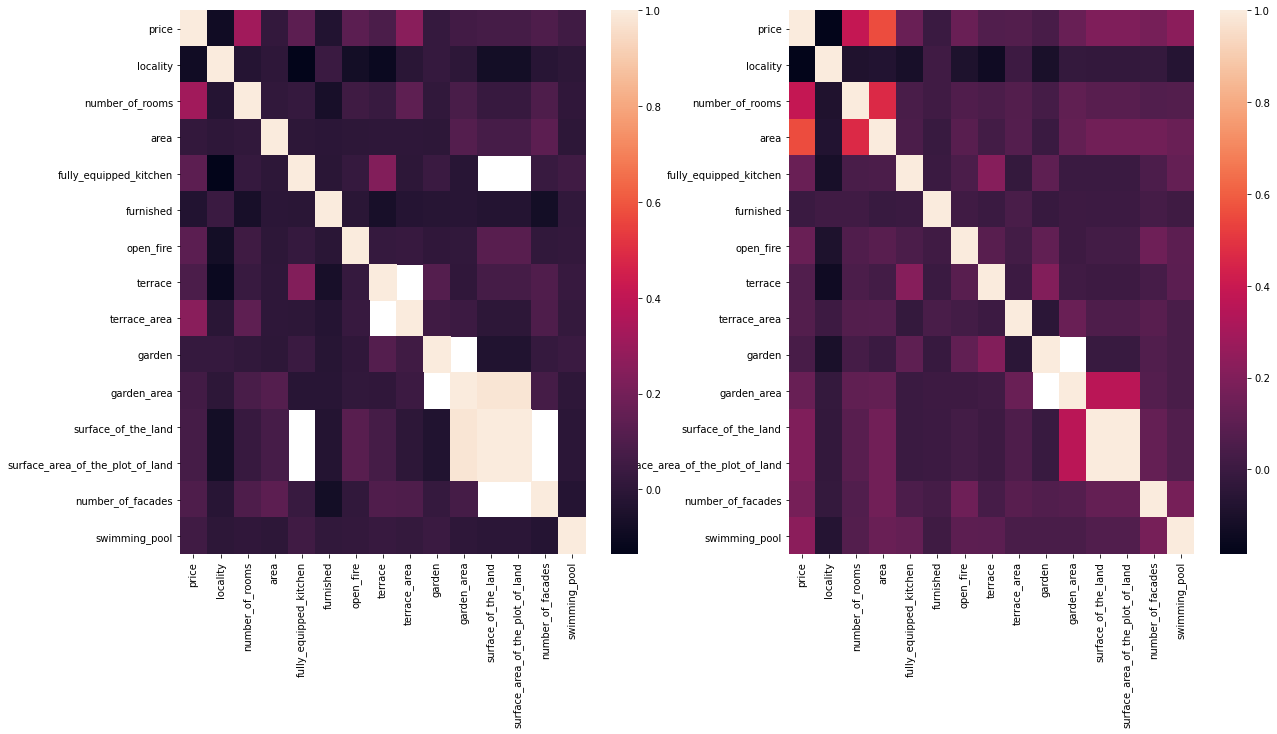

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
sns.heatmap(df[df['type_of_property']=='apartment'].corr(), ax=ax1)
sns.heatmap(df[df['type_of_property']=='house'].corr(), ax=ax2)
plt.show()

In [11]:
df[df['type_of_property']=='apartment'].corr()['price'].sort_values(ascending=False)

price                               1.000000
number_of_rooms                     0.321188
terrace_area                        0.257836
fully_equipped_kitchen              0.135950
open_fire                           0.133675
number_of_facades                   0.098858
terrace                             0.088271
surface_area_of_the_plot_of_land    0.070679
surface_of_the_land                 0.070679
garden_area                         0.061032
swimming_pool                       0.057825
garden                              0.027006
area                                0.016649
furnished                          -0.033005
locality                           -0.082602
Name: price, dtype: float64

In [12]:
df[df['type_of_property']=='house'].corr()['price'].sort_values(ascending=False)

price                               1.000000
area                                0.556285
number_of_rooms                     0.389175
swimming_pool                       0.228705
surface_area_of_the_plot_of_land    0.195631
surface_of_the_land                 0.195631
number_of_facades                   0.173101
fully_equipped_kitchen              0.138577
open_fire                           0.135628
garden_area                         0.130774
terrace_area                        0.073362
terrace                             0.067882
garden                              0.040312
furnished                          -0.001047
locality                           -0.184331
Name: price, dtype: float64

We see that area is more important for houses

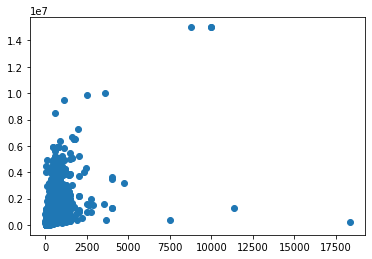

In [14]:
df_house = df[df['type_of_property']=='house']
plt.scatter(df_house['area'], df_house['price'])


Or without outliers:

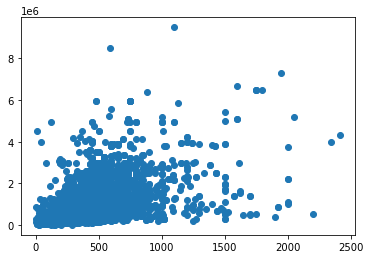

In [15]:
df_house_small = df_house[df_house['area']<2500]
plt.scatter(df_house_small['area'], df_house_small['price'])


## Comparisons of prices between the differents regions, provinces and locality 

In [16]:
df_cities = pd.read_csv('/home/nathanael/Documents/BeCode/Projects/Data_Analysis/challenge-data-analysis/DataCleaning/post_codes.csv', sep=';')
print(df_cities.shape)
df_cities.head()

(2825, 5)


,Code postal,Localité,Sous-commune,Commune principale,Province
0,8511,Aalbeke,Oui,KORTRIJK,Flandre-Occidentale
1,3200,AARSCHOT,Non,AARSCHOT,Brabant Flamand
2,5590,Achêne,Oui,CINEY,Namur
3,6250,Aiseau,Oui,AISEAU-PRESLES,Hainaut
4,7640,ANTOING,Non,ANTOING,Hainaut


In [19]:
province = {'province' : ['Flandre-Occidentale', 'Brabant Flamand', 'Namur', 'Hainaut',
       'Luxembourg', 'Flandre-Orientale', 'Liège', 'Limbourg',
       'Brabant Wallon', np.nan, 'Anvers', 'Bruxelles (19 communes)'],
           'region' : ['Flandre', 'Flandre', 'Wallonie', 'Wallonie', 'Wallonie', 'Flandre', 'Wallonie', 'Flandre',
                       'Wallonie', np.nan, 'Flandre', 'Bruxelles'
                      ]}
df_province = pd.DataFrame(province)
df_province

,province,region
0,Flandre-Occidentale,Flandre
1,Brabant Flamand,Flandre
2,Namur,Wallonie
3,Hainaut,Wallonie
4,Luxembourg,Wallonie
5,Flandre-Orientale,Flandre
6,Liège,Wallonie
7,Limbourg,Flandre
8,Brabant Wallon,Wallonie
9,NaN,NaN


In [20]:
df_cities = df_cities.merge(df_province, how= 'left', left_on='Province', right_on='province')
df_cities.head()

,Code postal,Localité,Sous-commune,Commune principale,Province,province,region
0,8511,Aalbeke,Oui,KORTRIJK,Flandre-Occidentale,Flandre-Occidentale,Flandre
1,3200,AARSCHOT,Non,AARSCHOT,Brabant Flamand,Brabant Flamand,Flandre
2,5590,Achêne,Oui,CINEY,Namur,Namur,Wallonie
3,6250,Aiseau,Oui,AISEAU-PRESLES,Hainaut,Hainaut,Wallonie
4,7640,ANTOING,Non,ANTOING,Hainaut,Hainaut,Wallonie


In [21]:
df_with_region = df.merge(df_cities[['Code postal', 'region']], how='left', left_on='locality', right_on='Code postal')
df_with_region.drop_duplicates(inplace=True)
df_with_region.head()

,price,locality,type_of_property,subtype_of_property,type_of_sale,number_of_rooms,area,fully_equipped_kitchen,furnished,open_fire,...,terrace_area,garden,garden_area,surface_of_the_land,surface_area_of_the_plot_of_land,number_of_facades,swimming_pool,state_of_the_building,Code postal,region
0,319799.0,2970,apartment,NaN,regular sale,1.0,NaN,0.0,0.0,0.0,...,11.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,2970.0,Flandre
2,291999.0,2970,apartment,NaN,regular sale,1.0,NaN,0.0,0.0,0.0,...,6.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,2970.0,Flandre
4,764999.0,2970,apartment,NaN,regular sale,2.0,153.0,0.0,0.0,0.0,...,62.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,2970.0,Flandre
6,660264.0,2970,apartment,NaN,regular sale,3.0,NaN,0.0,0.0,0.0,...,160.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,2970.0,Flandre
8,294999.0,3200,apartment,NaN,regular sale,2.0,80.0,0.0,0.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,3200.0,Flandre


We keep only some relevant variables:

In [22]:
df_with_region = df_with_region[['price', 'locality', 'region', 'type_of_property']]
df_with_region['price_per_m_square'] = df['price']/df['area']
df_with_region['area'] = df['area']
df_with_region.head()

,price,locality,region,type_of_property,price_per_m_square,area
0,319799.0,2970,Flandre,apartment,NaN,NaN
2,291999.0,2970,Flandre,apartment,4999.993464,153.0
4,764999.0,2970,Flandre,apartment,3687.487500,80.0
6,660264.0,2970,Flandre,apartment,2599.988889,90.0
8,294999.0,3200,Flandre,apartment,NaN,NaN


### we look at the mean value of price for each region:

In [23]:
df_with_region.groupby('region').agg(['mean','median'])[['price', 'price_per_m_square', 'area']]

price           price_per_m_square               \
                    mean    median               mean       median   
region                                                               
Bruxelles  611432.077640  370749.5        2811.569425  2591.750842   
Flandre    375969.230396  291799.0        2684.508621  2443.609023   
Wallonie   278776.175270  224999.0        2760.105370  2398.373984   

                 area         
                 mean median  
region                        
Bruxelles  144.155070  108.0  
Flandre    220.955805  120.0  
Wallonie   157.120049  121.0

Bruxelles is the most expensive regions, Flandre is second.
For price per m², Wallonie is seconde due to lower mean area.

In [25]:
df_with_region.groupby('region').describe()['price']

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Bruxelles,7728.0,611432.077640,816138.173395,1.0,249000.0,370749.5,650000.0,35000000.0
Flandre,42275.0,375969.230396,345374.028761,2500.0,229500.0,291799.0,394999.0,9876543.0
Wallonie,22434.0,278776.175270,315120.766471,2500.0,163236.5,224999.0,305000.0,15000000.0


Splitting by type of perperty:

In [30]:
df_with_region.groupby(['type_of_property', 'region']).describe()['price']

count          mean           std      min  \
type_of_property region                                                    
apartment        Bruxelles   5667.0  4.563736e+05  4.397273e+05      1.0   
                 Flandre    22792.0  3.284428e+05  2.740465e+05   2500.0   
                 Wallonie    8146.0  2.402853e+05  1.185159e+05  20000.0   
house            Bruxelles   2001.0  1.037578e+06  1.325433e+06  20000.0   
                 Flandre    19385.0  4.306907e+05  4.057270e+05   2500.0   
                 Wallonie   14077.0  2.992297e+05  3.824758e+05   2500.0   

                                 25%       50%         75%         max  
type_of_property region                                                 
apartment        Bruxelles  229000.0  320000.0   496999.50   5200000.0  
                 Flandre    214999.0  265000.0   348434.25   5300000.0  
                 Wallonie   170000.0  217000.0   275000.00   2250000.0  
house            Bruxelles  400000.0  630000.0  1200000.00  35000000.0  
                 Flandre    259000.0  329000.0   445000.00   9876543.0  
                 Wallonie   155000.0  229999.0   333878.00  15000000.0

### Price per province

In [31]:
df_with_province = df.merge(df_cities[['Code postal', 'province']], how='left', left_on='locality', right_on='Code postal')
df_with_province.drop_duplicates(inplace=True)
df_with_province = df_with_province[['price', 'locality', 'province', 'type_of_property']]
df_with_province.head()

,price,locality,province,type_of_property
0,319799.0,2970,Anvers,apartment
2,291999.0,2970,Anvers,apartment
4,764999.0,2970,Anvers,apartment
6,660264.0,2970,Anvers,apartment
8,294999.0,3200,Brabant Flamand,apartment


In [32]:
df_with_province.groupby(['type_of_property', 'province']).agg(['mean','std', 'median'])['price'].sort_values(by='mean', ascending=False)

mean           std    median
type_of_property province                                                     
house            Bruxelles (19 communes)  1.037578e+06  1.325433e+06  630000.0
                 Brabant Wallon           5.728406e+05  6.308051e+05  394999.0
                 Brabant Flamand          5.184300e+05  4.948942e+05  385558.5
                 Anvers                   4.976614e+05  4.731815e+05  364000.0
apartment        Bruxelles (19 communes)  4.563736e+05  4.397273e+05  320000.0
house            Flandre-Occidentale      4.033548e+05  4.015536e+05  299000.0
                 Flandre-Orientale        3.958770e+05  3.182488e+05  329000.0
                 Limbourg                 3.543660e+05  2.672512e+05  295000.0
apartment        Flandre-Occidentale      3.524378e+05  3.440802e+05  264999.0
                 Brabant Flamand          3.244489e+05  2.289159e+05  275000.0
                 Anvers                   3.143146e+05  2.313053e+05  265000.0
                 Brabant Wallon           3.120590e+05  1.428808e+05  279000.0
                 Flandre-Orientale        3.096168e+05  1.730766e+05  268999.5
house            Luxembourg               2.998904e+05  1.879654e+05  255000.0
                 Namur                    2.906181e+05  1.989294e+05  252500.0
apartment        Limbourg                 2.817607e+05  1.692646e+05  247424.5
house            Liège                    2.815727e+05  2.288038e+05  239000.0
                 Hainaut                  2.518019e+05  4.127312e+05  189900.0
apartment        Liège                    2.332253e+05  1.032836e+05  218499.5
                 Namur                    2.253116e+05  1.053894e+05  215000.0
                 Luxembourg               2.227712e+05  8.247066e+04  215000.0
                 Hainaut                  2.108160e+05  1.053211e+05  189000.0

In [36]:
df_with_province.groupby(['type_of_property', 'province']).describe()['price'].sort_values(by='mean', ascending=False)

count          mean           std  \
type_of_property province                                                      
house            Bruxelles (19 communes)  2001.0  1.037578e+06  1.325433e+06   
                 Brabant Wallon           1404.0  5.728406e+05  6.308051e+05   
                 Brabant Flamand          2648.0  5.184300e+05  4.948942e+05   
                 Anvers                   3636.0  4.976614e+05  4.731815e+05   
apartment        Bruxelles (19 communes)  5667.0  4.563736e+05  4.397273e+05   
house            Flandre-Occidentale      6580.0  4.033548e+05  4.015536e+05   
                 Flandre-Orientale        4860.0  3.958770e+05  3.182488e+05   
                 Limbourg                 1661.0  3.543660e+05  2.672512e+05   
apartment        Flandre-Occidentale      9655.0  3.524378e+05  3.440802e+05   
                 Brabant Flamand          2668.0  3.244489e+05  2.289159e+05   
                 Anvers                   4501.0  3.143146e+05  2.313053e+05   
                 Brabant Wallon           1651.0  3.120590e+05  1.428808e+05   
                 Flandre-Orientale        4350.0  3.096168e+05  1.730766e+05   
house            Luxembourg                880.0  2.998904e+05  1.879654e+05   
                 Namur                    1403.0  2.906181e+05  1.989294e+05   
apartment        Limbourg                 1618.0  2.817607e+05  1.692646e+05   
house            Liège                    4035.0  2.815727e+05  2.288038e+05   
                 Hainaut                  6355.0  2.518019e+05  4.127312e+05   
apartment        Liège                    2656.0  2.332253e+05  1.032836e+05   
                 Namur                     629.0  2.253116e+05  1.053894e+05   
                 Luxembourg                357.0  2.227712e+05  8.247066e+04   
                 Hainaut                  2853.0  2.108160e+05  1.053211e+05   

                                              min       25%       50%  \
type_of_property province                                               
house            Bruxelles (19 communes)  20000.0  400000.0  630000.0   
                 Brabant Wallon           30000.0  279000.0  394999.0   
                 Brabant Flamand           2500.0  299000.0  385558.5   
                 Anvers                   25000.0  285000.0  364000.0   
apartment        Bruxelles (19 communes)      1.0  229000.0  320000.0   
house            Flandre-Occidentale      10000.0  245000.0  299000.0   
                 Flandre-Orientale        25000.0  259000.0  329000.0   
                 Limbourg                 17500.0  239000.0  295000.0   
apartment        Flandre-Occidentale       2500.0  199000.0  264999.0   
                 Brabant Flamand          79000.0  229000.0  275000.0   
                 Anvers                   55000.0  217000.0  265000.0   
                 Brabant Wallon           30000.0  232824.5  279000.0   
                 Flandre-Orientale        10000.0  220000.0  268999.5   
house            Luxembourg               19000.0  175000.0  255000.0   
                 Namur                    22000.0  178000.0  252500.0   
apartment        Limbourg                 73500.0  209000.0  247424.5   
house            Liège                     2500.0  169949.5  239000.0   
                 Hainaut                  10000.0  130000.0  189900.0   
apartment        Liège                    33500.0  178000.0  218499.5   
                 Namur                    50000.0  165000.0  215000.0   
                 Luxembourg               64000.0  173999.0  215000.0   
                 Hainaut                  20000.0  155000.0  189000.0   

                                                 75%         max  
type_of_property province                                         
house            Bruxelles (19 communes)  1200000.00  35000000.0  
                 Brabant Wallon            589999.25   6500000.0  
                 Brabant Flamand           525000.00   9500000.0  
                 Anvers           

There big differences between provinces. This should be an interesting features

### Price per locality

In [33]:
df_loc = df_with_region.groupby('locality').agg(['mean','median', 'size'])
df_loc = df_loc['price']
df_loc[df_loc['size']>2].sort_values(by= 'mean', ascending=False)  #some locality have only one data, we exclude them from the mean

,mean,median,size
locality,,,
1380,1.359240e+06,895000.0,137
1640,1.224902e+06,628999.0,103
7021,1.140106e+06,196999.0,47
1170,1.081651e+06,580000.0,125
2920,1.057028e+06,590000.0,29
...,...,...,...
4602,1.336992e+05,131999.0,10
7340,1.316284e+05,120000.0,127
6440,1.269279e+05,92499.0,14


most expansive localities are near Bruxelles


There a big difference in prices between localities but some locality have few data. This does not happen with provinces:

In [34]:
df.groupby(['locality']).size().mean()

72.1134328358209

In [35]:
df_with_province.groupby(['province']).size().mean()

6585.181818181818